## A. Importing Modules & Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
import math
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit
import tensorflow as tf

df = pd.read_csv("./reports/company_report_2.csv")

In [2]:
df.head(10)

,company_id,company_type,time,date,month,year,day,is_weekend,season,avg_pesq_score,...,temporarily_unable_test,outage_hrs,outage_mins,outage_secs,number_test_types,numbers_tested,followup_tests,min_commit,is_testing,volume_tests
0,2,Enterprise,2018-01-01,1,1,2018,Mon,0,Winter,3.692000,...,0,7031.92,421915.12,25314907,2,2410,100,400000,Y,35365
1,2,Enterprise,2018-01-02,2,1,2018,Tues,0,Winter,3.691167,...,0,7047.44,422846.28,25370777,2,2444,434,400000,Y,36718
2,2,Enterprise,2018-01-03,3,1,2018,Wed,0,Winter,3.678875,...,0,7055.92,423355.10,25401306,2,2433,370,400000,Y,36880
3,2,Enterprise,2018-01-04,4,1,2018,Thurs,0,Winter,3.613167,...,0,7033.92,422035.35,25322121,2,2441,420,400000,Y,35809
4,2,Enterprise,2018-01-05,5,1,2018,Fri,0,Winter,3.600375,...,0,7019.11,421146.40,25268784,2,2336,420,400000,Y,34462
5,2,Enterprise,2018-01-06,6,1,2018,Sat,1,Winter,3.642437,...,0,7031.92,421915.12,25314907,2,313,50,400000,Y,13361
6,2,Enterprise,2018-01-07,7,1,2018,Sun,1,Winter,3.662000,...,3,7023.74,421424.52,25285471,2,282,60,400000,Y,12310
7,2,Enterprise,2018-01-08,8,1,2018,Mon,0,Winter,3.627458,...,56,6997.40,419843.98,25190639,2,2439,360,400000,Y,34483
8,2,Enterprise,2018-01-09,9,1,2018,Tues,0,Winter,3.596833,...,3,6985.12,419107.38,25146443,2,2434,340,400000,Y,35730
9,2,Enterprise,2018-01-10,10,1,2018,Wed,0,Winter,3.602971,...,0,6971.90,418313.75,25098825,2,2453,518,400000,Y,36843


In [3]:
df.tail(10)

,company_id,company_type,time,date,month,year,day,is_weekend,season,avg_pesq_score,...,temporarily_unable_test,outage_hrs,outage_mins,outage_secs,number_test_types,numbers_tested,followup_tests,min_commit,is_testing,volume_tests
720,2,Enterprise,2019-12-22,22,12,2019,Sun,1,Winter,3.762625,...,0,10127.88,607672.97,36460378,4,1315,0,400000,Y,20759
721,2,Enterprise,2019-12-23,23,12,2019,Mon,0,Winter,3.751375,...,3,10168.36,610101.75,36606105,4,4158,68,400000,Y,35527
722,2,Enterprise,2019-12-24,24,12,2019,Tues,0,Winter,3.755500,...,0,10311.83,618710.03,37122602,4,4163,72,400000,Y,36090
723,2,Enterprise,2019-12-25,25,12,2019,Wed,0,Winter,3.760375,...,0,10225.36,613521.72,36811303,4,4153,9,400000,Y,36118
724,2,Enterprise,2019-12-26,26,12,2019,Thurs,0,Winter,3.761333,...,0,10304.21,618252.47,37095148,4,4157,54,400000,Y,36047
725,2,Enterprise,2019-12-27,27,12,2019,Fri,0,Winter,3.756708,...,2,10363.38,621802.63,37308158,4,3357,91,400000,Y,34585
726,2,Enterprise,2019-12-28,28,12,2019,Sat,1,Winter,3.756750,...,0,10367.88,622072.80,37324368,4,519,14,400000,Y,19898
727,2,Enterprise,2019-12-29,29,12,2019,Sun,1,Winter,3.774667,...,0,10358.47,621507.90,37290474,4,1318,41,400000,Y,20947
728,2,Enterprise,2019-12-30,30,12,2019,Mon,0,Winter,3.753833,...,33,10343.88,620632.82,37237969,4,4153,45,400000,Y,35616
729,2,Enterprise,2019-12-31,31,12,2019,Tues,0,Winter,3.749500,...,30,10627.66,637659.48,38259569,4,4157,37,400000,Y,36029


In [4]:
df.describe()

,company_id,date,month,year,is_weekend,avg_pesq_score,quality_too_poor,number_busy,temporarily_unable_test,outage_hrs,outage_mins,outage_secs,number_test_types,numbers_tested,followup_tests,min_commit,volume_tests
count,730.0,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,7.300000e+02,730.000000,730.000000,730.000000,730.0,730.000000
mean,2.0,15.720548,6.526027,2018.500000,0.284932,3.749444,19.463014,369.597260,63.017808,8649.266205,518955.977041,3.113736e+07,3.249315,2336.567123,144.884932,400000.0,37778.194521
std,0.0,8.802278,3.450215,0.500343,0.451691,0.060763,33.025274,355.118878,158.018807,978.525725,58711.549471,3.522693e+06,0.532387,1139.618676,170.793076,0.0,11522.261007
min,2.0,1.000000,1.000000,2018.000000,0.000000,3.582000,0.000000,0.000000,0.000000,6714.230000,402853.820000,2.417123e+07,2.000000,274.000000,0.000000,400000.0,7679.000000
25%,2.0,8.000000,4.000000,2018.000000,0.000000,3.692386,4.000000,117.250000,0.000000,7845.232500,470713.765000,2.824283e+07,3.000000,1001.750000,45.000000,400000.0,25680.000000
50%,2.0,16.000000,7.000000,2018.500000,0.000000,3.777859,10.000000,271.000000,5.000000,9047.900000,542873.720000,3.257242e+07,3.000000,2710.500000,97.000000,400000.0,40282.000000
75%,2.0,23.000000,10.000000,2019.000000,1.000000,3.800701,26.000000,523.000000,54.000000,9294.042500,557642.570000,3.345855e+07,4.000000,3093.750000,200.000000,400000.0,46231.500000
max,2.0,31.000000,12.000000,2019.000000,1.000000,3.850378,627.000000,4456.000000,1258.000000,10627.660000,637659.480000,3.825957e+07,4.000000,4200.000000,2337.000000,400000.0,57033.000000


## B. Missing Values

In [5]:
# Find the number of nulls/NaNs in the dataset

df.apply(lambda x: sum(x.isnull()), axis=0)

company_id                 0
company_type               0
time                       0
date                       0
month                      0
year                       0
day                        0
is_weekend                 0
season                     0
avg_pesq_score             0
quality_too_poor           0
number_busy                0
temporarily_unable_test    0
outage_hrs                 0
outage_mins                0
outage_secs                0
number_test_types          0
numbers_tested             0
followup_tests             0
min_commit                 0
is_testing                 0
volume_tests               0
dtype: int64

#### This shows that there was no missing data

### C. Extreme Values/Outliers

In [6]:
df.describe()

,company_id,date,month,year,is_weekend,avg_pesq_score,quality_too_poor,number_busy,temporarily_unable_test,outage_hrs,outage_mins,outage_secs,number_test_types,numbers_tested,followup_tests,min_commit,volume_tests
count,730.0,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,7.300000e+02,730.000000,730.000000,730.000000,730.0,730.000000
mean,2.0,15.720548,6.526027,2018.500000,0.284932,3.749444,19.463014,369.597260,63.017808,8649.266205,518955.977041,3.113736e+07,3.249315,2336.567123,144.884932,400000.0,37778.194521
std,0.0,8.802278,3.450215,0.500343,0.451691,0.060763,33.025274,355.118878,158.018807,978.525725,58711.549471,3.522693e+06,0.532387,1139.618676,170.793076,0.0,11522.261007
min,2.0,1.000000,1.000000,2018.000000,0.000000,3.582000,0.000000,0.000000,0.000000,6714.230000,402853.820000,2.417123e+07,2.000000,274.000000,0.000000,400000.0,7679.000000
25%,2.0,8.000000,4.000000,2018.000000,0.000000,3.692386,4.000000,117.250000,0.000000,7845.232500,470713.765000,2.824283e+07,3.000000,1001.750000,45.000000,400000.0,25680.000000
50%,2.0,16.000000,7.000000,2018.500000,0.000000,3.777859,10.000000,271.000000,5.000000,9047.900000,542873.720000,3.257242e+07,3.000000,2710.500000,97.000000,400000.0,40282.000000
75%,2.0,23.000000,10.000000,2019.000000,1.000000,3.800701,26.000000,523.000000,54.000000,9294.042500,557642.570000,3.345855e+07,4.000000,3093.750000,200.000000,400000.0,46231.500000
max,2.0,31.000000,12.000000,2019.000000,1.000000,3.850378,627.000000,4456.000000,1258.000000,10627.660000,637659.480000,3.825957e+07,4.000000,4200.000000,2337.000000,400000.0,57033.000000


#### Lets plot histograms for each numerical atrribute

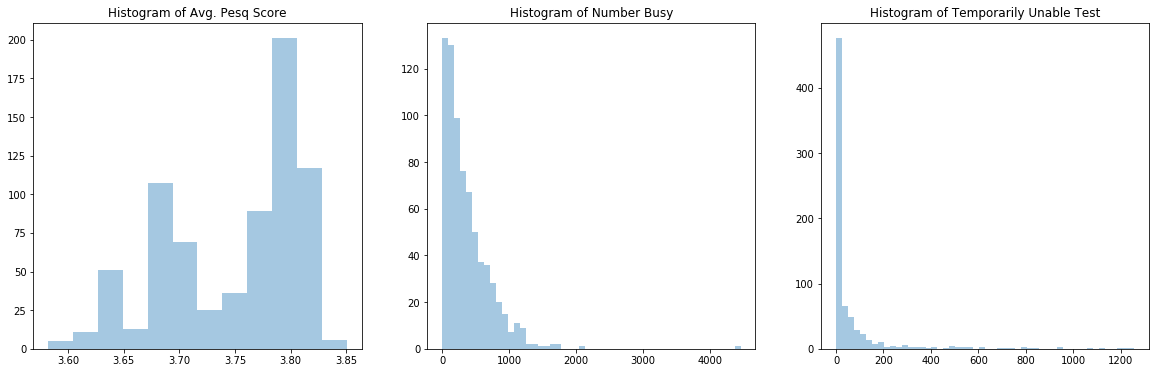

In [7]:
# Create figure with two subplots
fig = plt.figure(figsize=(20,6))

# Plot avg_pesq_score
ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title("Histogram of Avg. Pesq Score")
sns.distplot(df['avg_pesq_score'], kde=False, axlabel=False, label='avg_pesq_score')

# Plot number_busy
ax1 = fig.add_subplot(1, 3, 2)
ax1.set_title("Histogram of Number Busy")
sns.distplot(df['number_busy'], kde=False, axlabel=False, label='number_busy')

# Plot temporarily_unable_test
ax1 = fig.add_subplot(1, 3, 3)
ax1.set_title("Histogram of Temporarily Unable Test")
sns.distplot(df['temporarily_unable_test'], kde=False,axlabel=False, label='temporarily_unable_test')

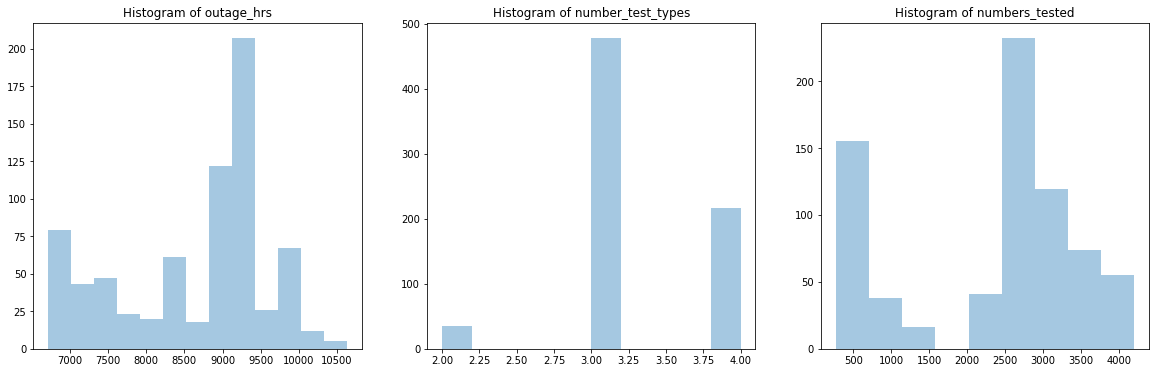

In [8]:
# Create figure with two subplots
fig = plt.figure(figsize=(20,6))

# Plot outage_hrs
ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title("Histogram of outage_hrs")
sns.distplot(df['outage_hrs'], kde=False,axlabel=False, label='outage_hrs')

# Plot number_test_types
ax1 = fig.add_subplot(1, 3, 2)
ax1.set_title("Histogram of number_test_types")
sns.distplot(df['number_test_types'], kde=False,axlabel=False, label='number_test_types')

# Plot numbers_tested
ax2 = fig.add_subplot(1, 3, 3)
ax2.set_title("Histogram of numbers_tested")
sns.distplot(df['numbers_tested'], kde=False,axlabel=False, label='numbers_tested')

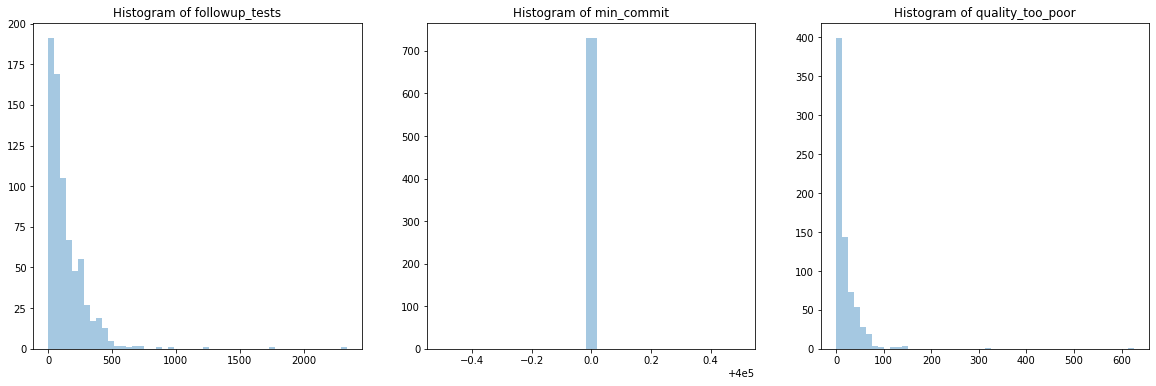

In [9]:
# Create figure with two subplots
fig = plt.figure(figsize=(20,6))

# Plot followup_tests
ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title("Histogram of followup_tests")
sns.distplot(df['followup_tests'], kde=False,axlabel=False, label='followup_tests')

# Plot min_commit
ax1 = fig.add_subplot(1, 3, 2)
ax1.set_title("Histogram of min_commit")
sns.distplot(df['min_commit'], kde=False,axlabel=False, label='min_commit')

# Plot quality_too_poor
ax2 = fig.add_subplot(1, 3, 3)
ax2.set_title("Histogram of quality_too_poor")
sns.distplot(df['quality_too_poor'], kde=False,axlabel=False, label='quality_too_poor')

#### From the plots above we can see the columns with extreme values or inbalanced distribution are number_busy, temporarily_unable_test, outage_hrs, numbers_tested, followup_tests, quality_too_poor

### Number Busy

In [10]:
df['number_busy'].describe()

count     730.000000
mean      369.597260
std       355.118878
min         0.000000
25%       117.250000
50%       271.000000
75%       523.000000
max      4456.000000
Name: number_busy, dtype: float64

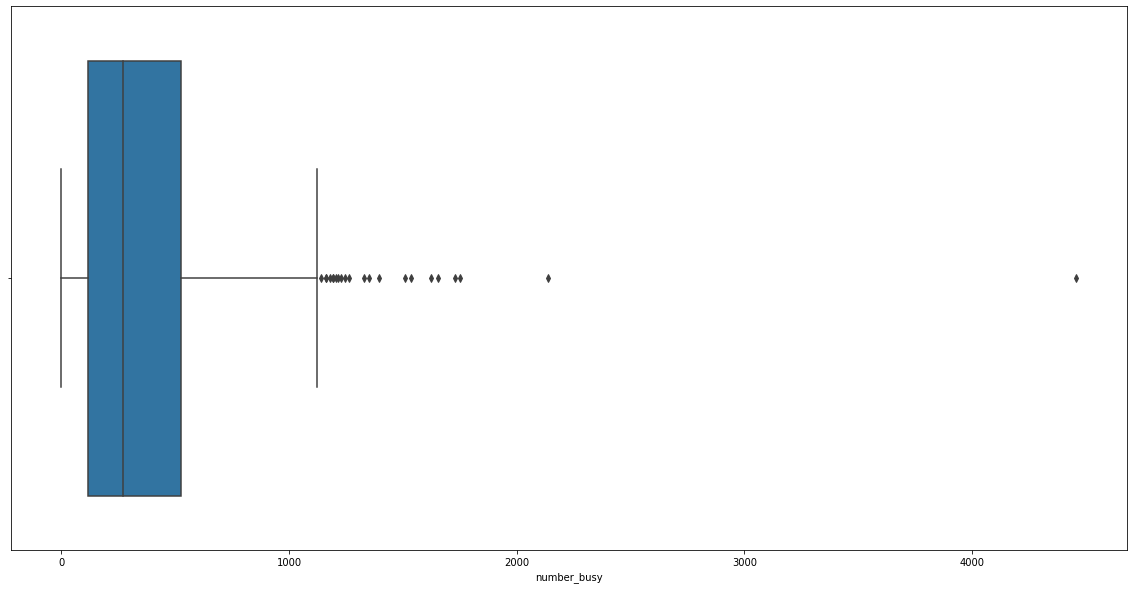

In [11]:
plt.figure(figsize=(20, 10))
sns.boxplot(x=df['number_busy'])

In [12]:
print((df[['number_busy']] > 2000).sum())

number_busy    2
dtype: int64


In [13]:
# Get names of indexes for which column temporarily_unable_test has value 1000
index = df[ df['number_busy'] > 2000 ].index

# Delete these row indexes from dataFrame
df.drop(index , inplace=True)

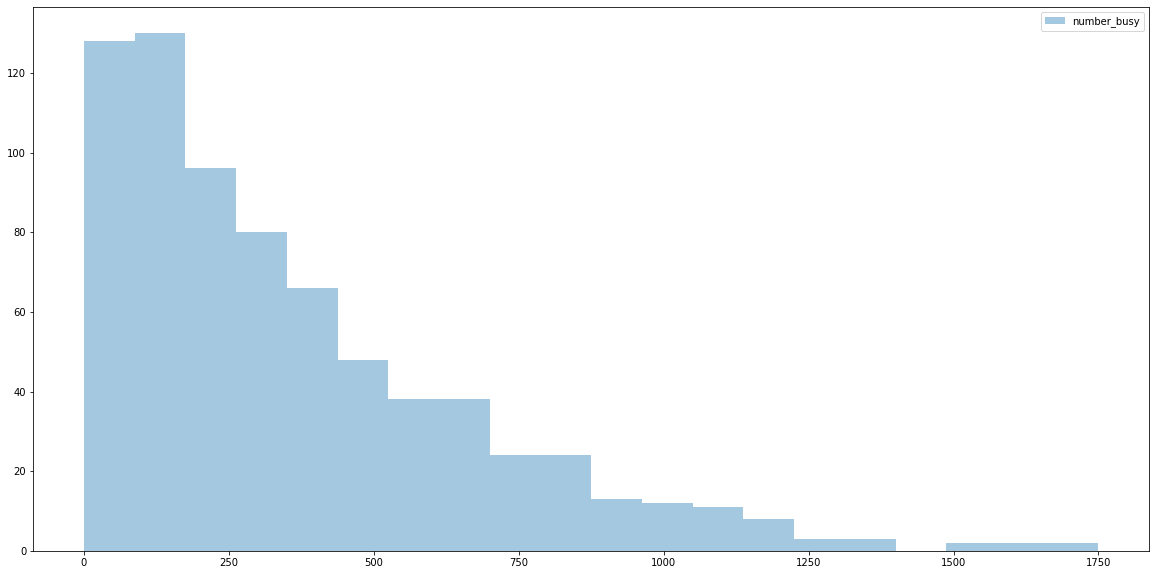

In [14]:
plt.figure(figsize=(20, 10))
sns.distplot(df['number_busy'], kde=False, axlabel=False, label='number_busy')
plt.legend()
plt.show()

### Temporarily Unable Test

In [15]:
df['temporarily_unable_test'].describe()

count     728.000000
mean       63.152473
std       158.213366
min         0.000000
25%         0.000000
50%         5.000000
75%        54.000000
max      1258.000000
Name: temporarily_unable_test, dtype: float64

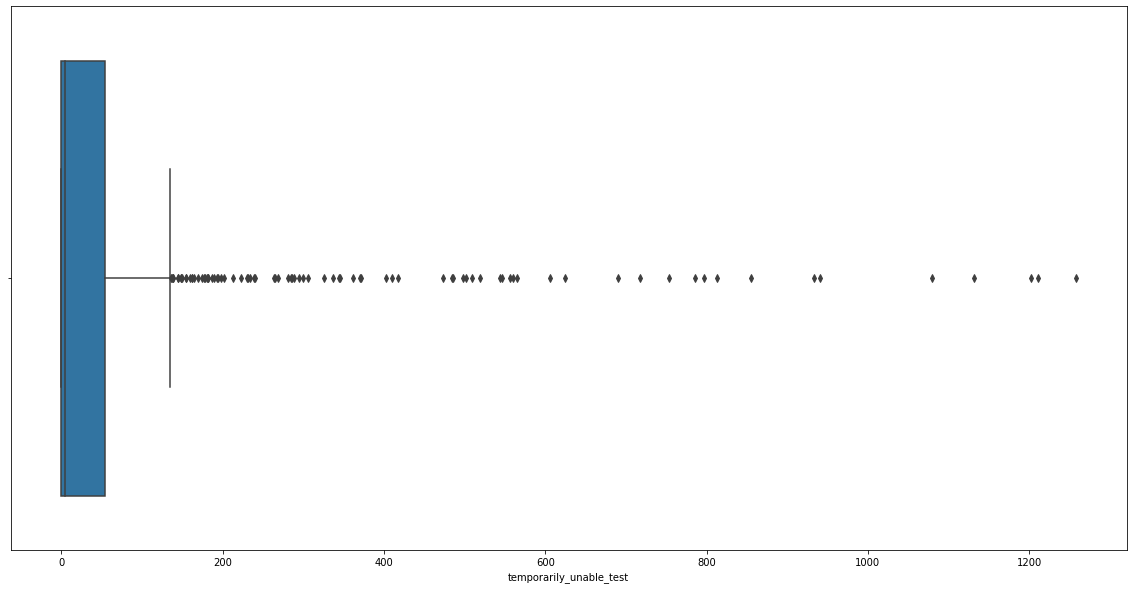

In [16]:
plt.figure(figsize=(20, 10))
sns.boxplot(x=df['temporarily_unable_test'])

#### Above plot shows alot of extrame values outside the 75% quartile. In particular there are quite a few outliers that are greater than 1000. Lets see how many points this effects. 

In [17]:
print((df[['temporarily_unable_test']] > 1000).sum())

temporarily_unable_test    5
dtype: int64


#### As we can see there 5 results over 1000. This is around ~0.68% of the dataset I can safely remove this as they will not have a big affect the model.

In [18]:
# Get names of indexes for which column temporarily_unable_test has value 1000
index = df[ df['temporarily_unable_test'] > 1000 ].index

# Delete these row indexes from dataFrame
df.drop(index , inplace=True)

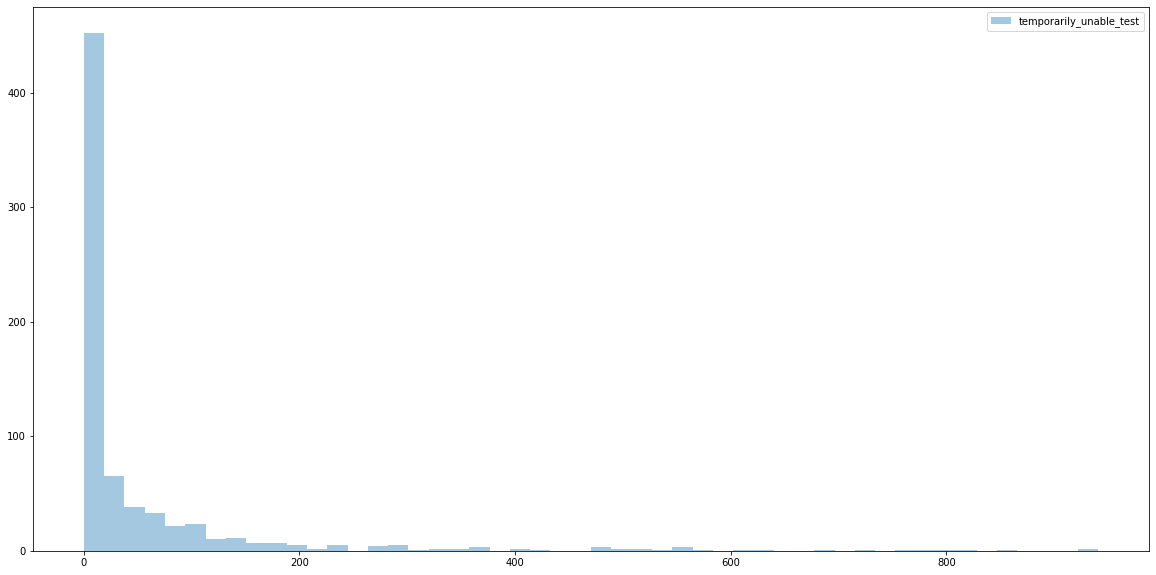

In [19]:
plt.figure(figsize=(20, 10))
sns.distplot(df['temporarily_unable_test'], kde=False, axlabel=False, label='temporarily_unable_test')
plt.legend()
plt.show()

### Follow-up_tests

In [20]:
# Use a log transformation to decrease the impact of extreme values in column followup_tests
df['followup_tests_log'] = np.log(df['followup_tests'] + 1)

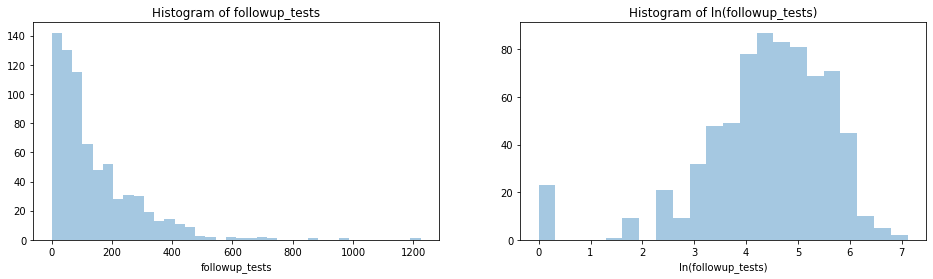

In [21]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot Balance
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of followup_tests")
ax1.set_xlabel('followup_tests')
sns.distplot(df['followup_tests'], kde=False, axlabel=False, label='followup_tests')

# Plot duration
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Histogram of ln(followup_tests)")
ax2.set_xlabel('ln(followup_tests)')
sns.distplot(df['followup_tests_log'], kde=False, axlabel=False, label='ln(followup_tests)')

#### Logs can also be used to reduce the impact of outliers in our model without losing information

### Quality Too Poor

In [22]:
df['quality_too_poor'].describe()

count    723.000000
mean      19.466113
std       33.157559
min        0.000000
25%        4.000000
50%       10.000000
75%       26.000000
max      627.000000
Name: quality_too_poor, dtype: float64

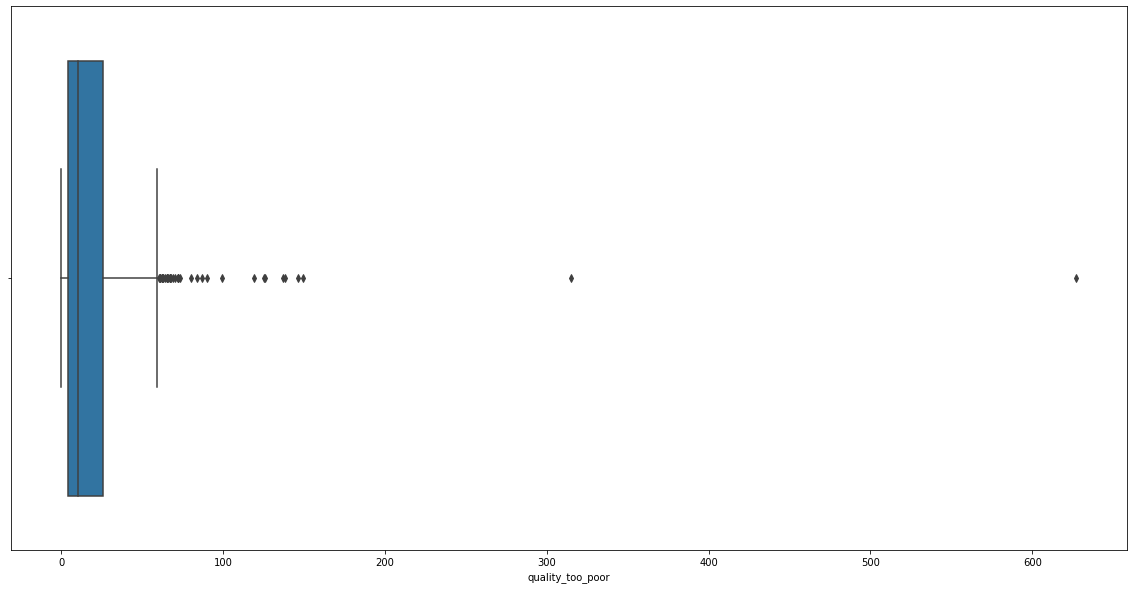

In [23]:
plt.figure(figsize=(20, 10))
sns.boxplot(x=df['quality_too_poor'])

In [24]:
print((df[['quality_too_poor']] > 300).sum())

quality_too_poor    2
dtype: int64


In [25]:
# Get names of indexes for which column outage_hrs has value < 1000 
index = df[ df['quality_too_poor'] > 300 ].index

# Delete these row indexes from dataFrame
df.drop(index , inplace=True)

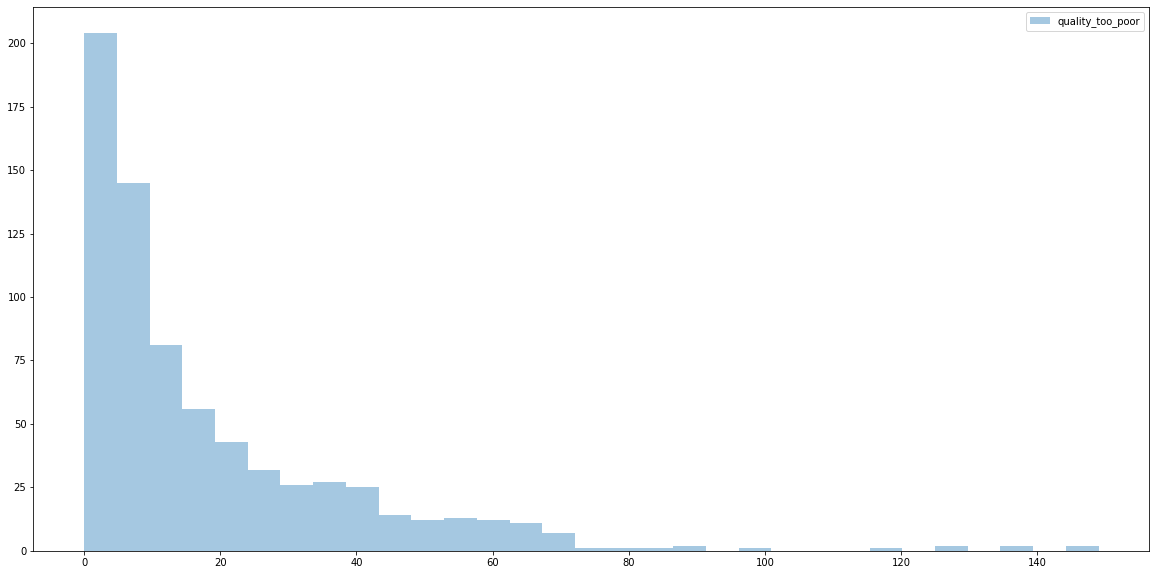

In [26]:
plt.figure(figsize=(20, 10))
sns.distplot(df['quality_too_poor'], kde=False, axlabel=False, label='quality_too_poor')
plt.legend()
plt.show()

### Outage Hrs

In [27]:
# Use a log transformation to decrease the impact of extreme values in column followup_tests
df['outage_hrs_log'] = np.log(df['outage_hrs'])

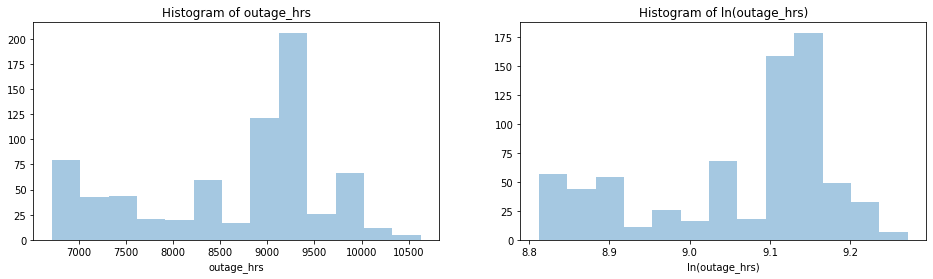

In [28]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot Balance
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of outage_hrs")
ax1.set_xlabel('outage_hrs')
sns.distplot(df['outage_hrs'], kde=False, axlabel=False, label='outage_hrs')

# Plot duration
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Histogram of ln(outage_hrs)")
ax2.set_xlabel('ln(outage_hrs)')
sns.distplot(df['outage_hrs_log'], kde=False, axlabel=False, label='ln(outage_hrs)')

### Numbers Tested

In [29]:
# Use a log transformation to decrease the impact of extreme values in column followup_tests
df['numbers_tested_log'] = np.log(df['numbers_tested'])

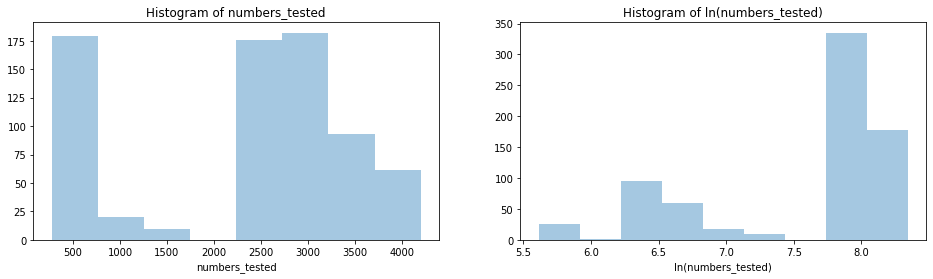

In [30]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot Balance
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of numbers_tested")
ax1.set_xlabel('numbers_tested')
sns.distplot(df['numbers_tested'], kde=False, axlabel=False, label='numbers_tested')

# Plot duration
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Histogram of ln(numbers_tested)")
ax2.set_xlabel('ln(numbers_tested)')
sns.distplot(df['numbers_tested_log'], kde=False, axlabel=False, label='ln(numbers_tested_log)')

#### As we have created new feature for number_busy, followup_tests, outage_hrs we can drop these feature

In [31]:
df.drop(['followup_tests','outage_hrs', 'numbers_tested'], inplace=True, axis=1)

## D. Linear Regression, Distribution, Hoeffding Equation

In [32]:
# lets define our input features
X = np.vstack((df['numbers_tested_log'], df['is_weekend'], df['outage_hrs_log'])).T

# lets also define our output feature
Y = np.hstack((df['volume_tests']))

# Split data set into training and test data
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#fit training data on linear regression model
clf = LinearRegression().fit(xTrain, yTrain)

#Calculate Ein and Eout
Ein = 1 - clf.score(xTrain, yTrain)
Eout = 1 - clf.score(xTest, yTest)
print(Ein)
print(Eout)

0.11499551718262235
0.07215658487796439


In [33]:
def experiment(users, weights, N, df):
    outcomes = []
    for i in range(users):
        # lets choose a sample from dataset
        sample = df.sample(n=N)
        # lets define our input features from the random sample
        X = np.vstack((sample['numbers_tested_log'], sample['is_weekend'], sample['outage_hrs_log'])).T

        # lets also define our output feature from our random sample
        Y = np.vstack(((sample['volume_tests'])))

        # calculate in-sample error
        Ein = 1 - clf.score(X, Y)
        
        # add in sample error to outcome list
        outcomes.append(Ein)
    
    v_1 = outcomes[0] 
    v_rand = outcomes[rnd.randint(0,users-1)]
    v_min = min(outcomes)
    
    return v_1,v_rand,v_min

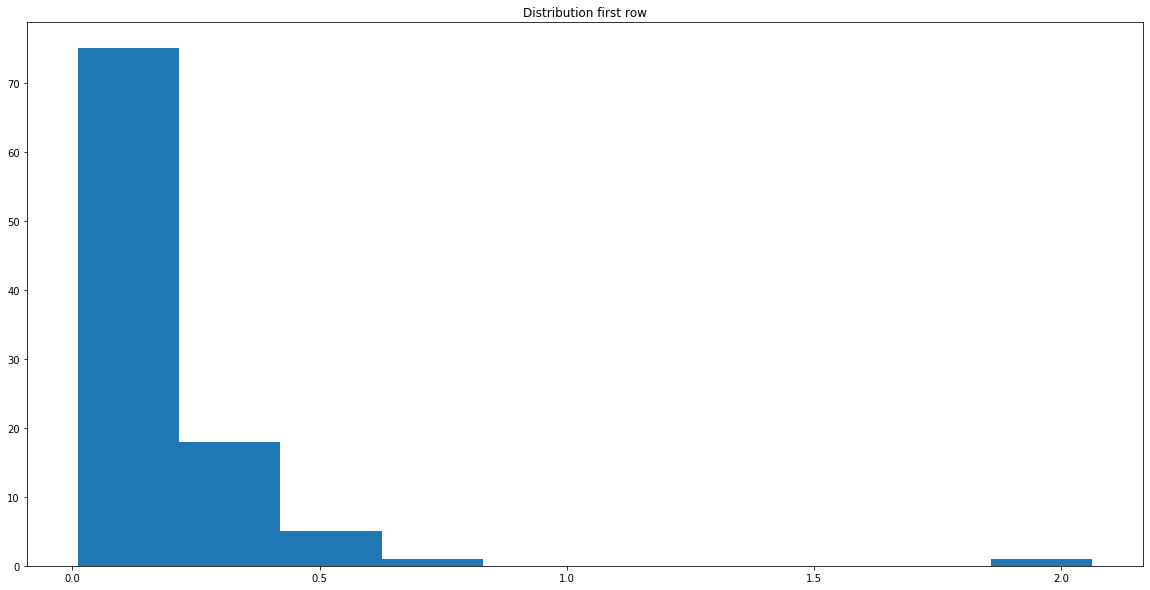

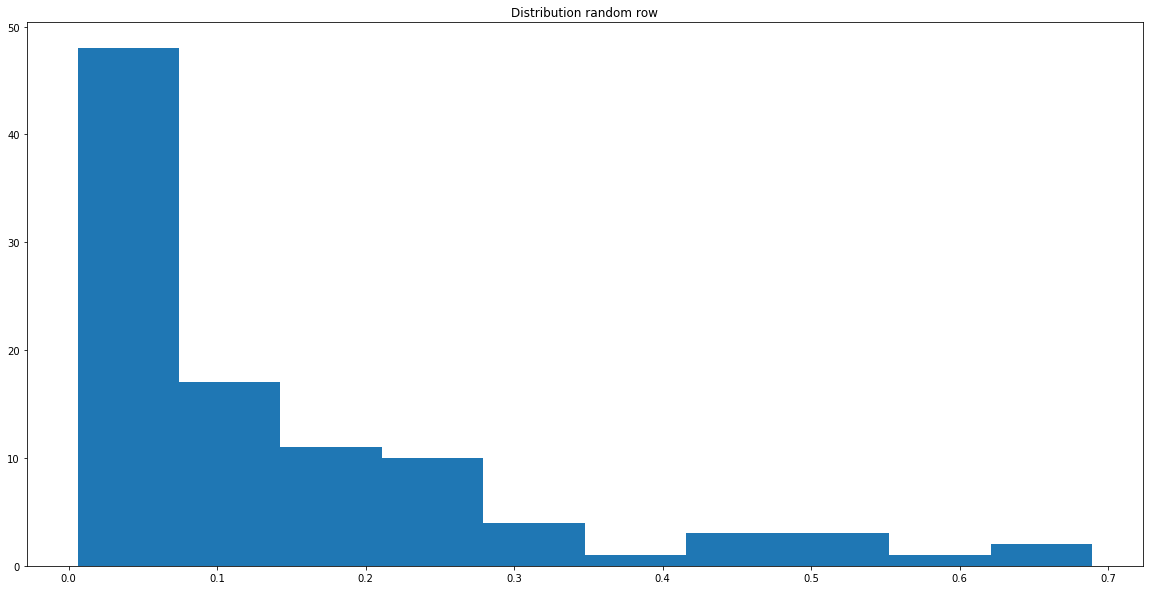

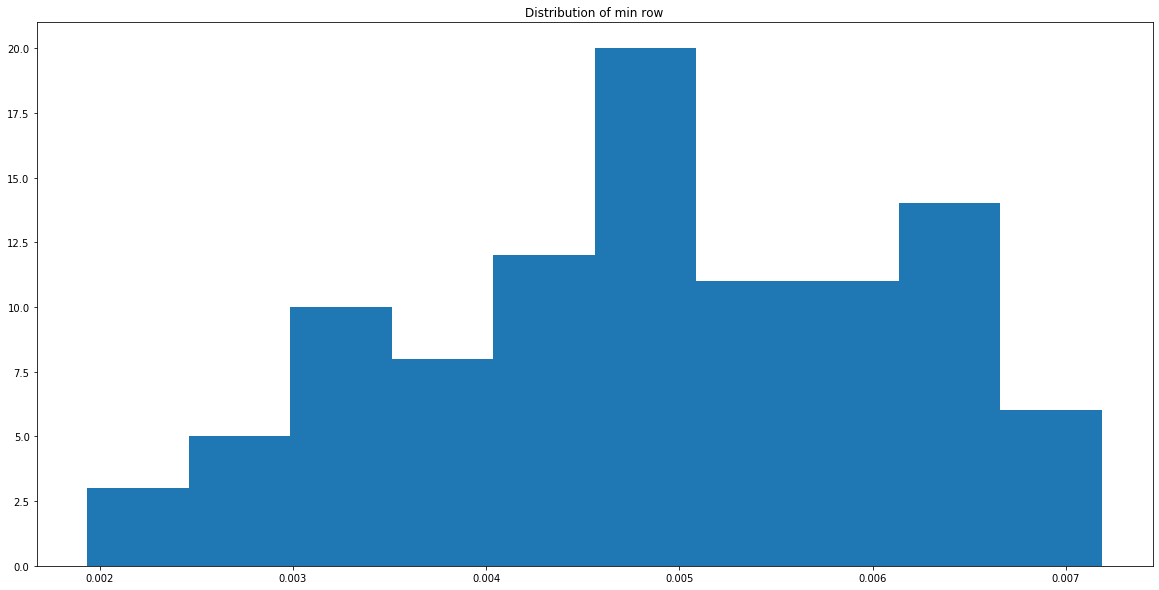

In [34]:
users = len(X)
N=10
repeats = 100

dist_1 = []
dist_rand=[]
dist_min=[]
lists = [dist_1, dist_rand, dist_min]

#d = np.column_stack((X,y))
#df = pd.DataFrame(data=d, dtype=np.int8)

for e in range(repeats):
    for x, lst in zip(experiment(users, clf, N, df), lists):
        lst.append(x)

plt.figure(figsize=(20, 10))
plt.hist(lists[0])
plt.title('Distribution first row')
plt.show()

plt.figure(figsize=(20, 10))
plt.hist(lists[1])
plt.title('Distribution random row')
plt.show()

plt.figure(figsize=(20, 10))
plt.hist(lists[2])
plt.title('Distribution of min row')
plt.show()

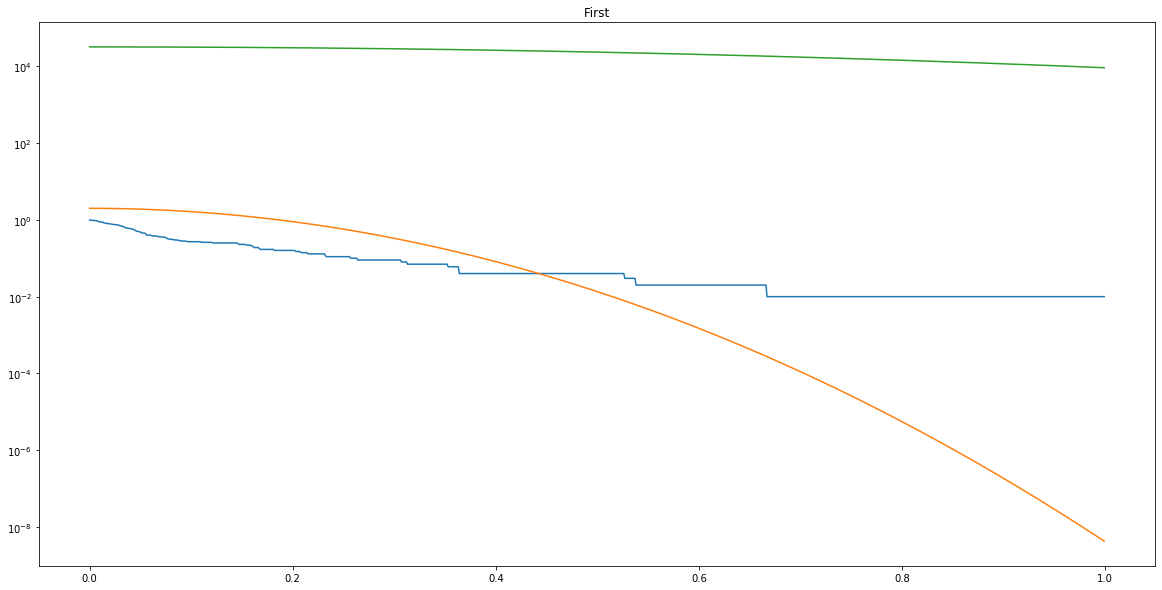

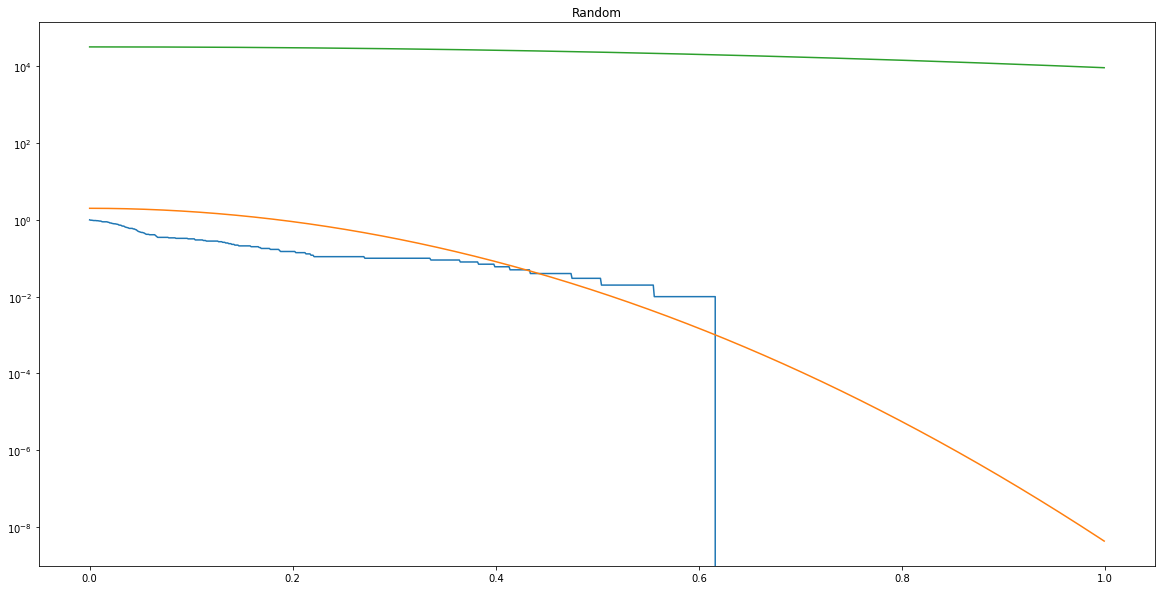

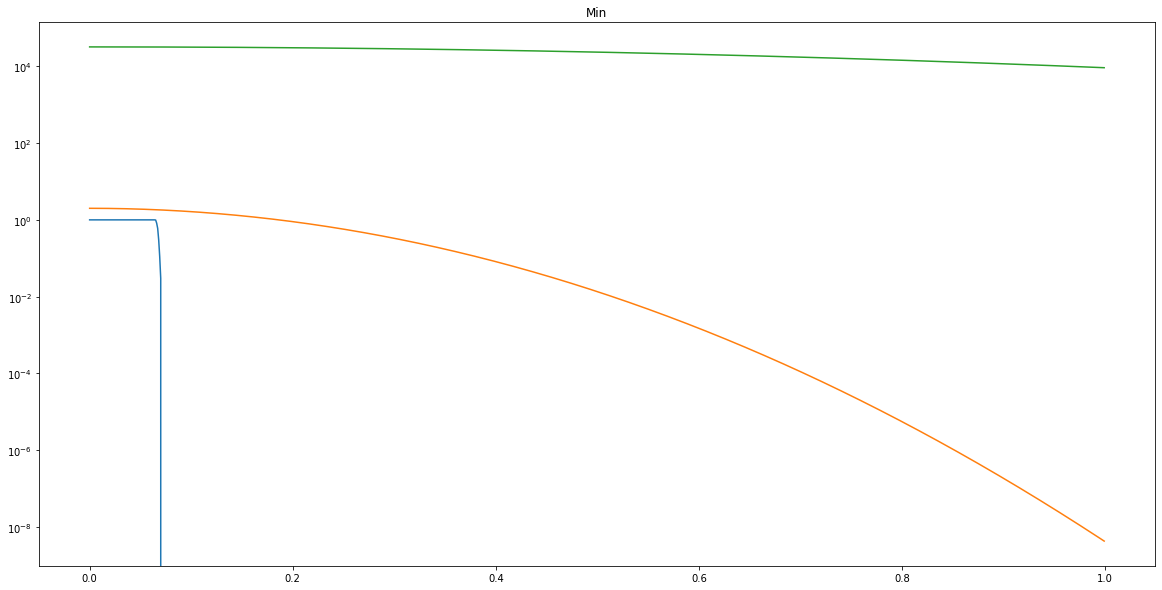

In [35]:
titles = ["First", "Random", "Min"]
dvc = len(X[0])
for d in range(0,3):
    dist = lists[d]
    prob_epsilon=[]
    epsilons = np.arange(0, 1, 0.001)
    for e in epsilons:
        prob_epsilon.append(len([1 for i in dist if abs(i-Eout) > e])/len(dist))
    
    plt.figure(figsize=(20, 10))
    plt.plot(epsilons, prob_epsilon)
    plt.plot(epsilons, [2*math.exp(-2*e**2*N) for e in epsilons])
    plt.plot(epsilons, [4*((2*N)**dvc+1)*math.exp(-(1/8)*e**2*N) for e in epsilons]) 
    plt.yscale('log')
    plt.title(titles[d])
    plt.show

### Hoeffding Equation - Is Learning Feasible?
#### The Random & Min tend to obey Hoeffding bound, while First does not. If I tweak my input features could I get my results to be more consistent?

## E. Plotting Learning Curves & Exploring Other Machine Learning Algorithms

In [36]:
X = np.vstack((df['numbers_tested_log'], df['is_weekend'], df['outage_hrs_log'])).T
Y = np.hstack(((df['volume_tests'])))

In [37]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes)
        
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    return plt

<module 'matplotlib.pyplot' from '/home/shanebowen/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

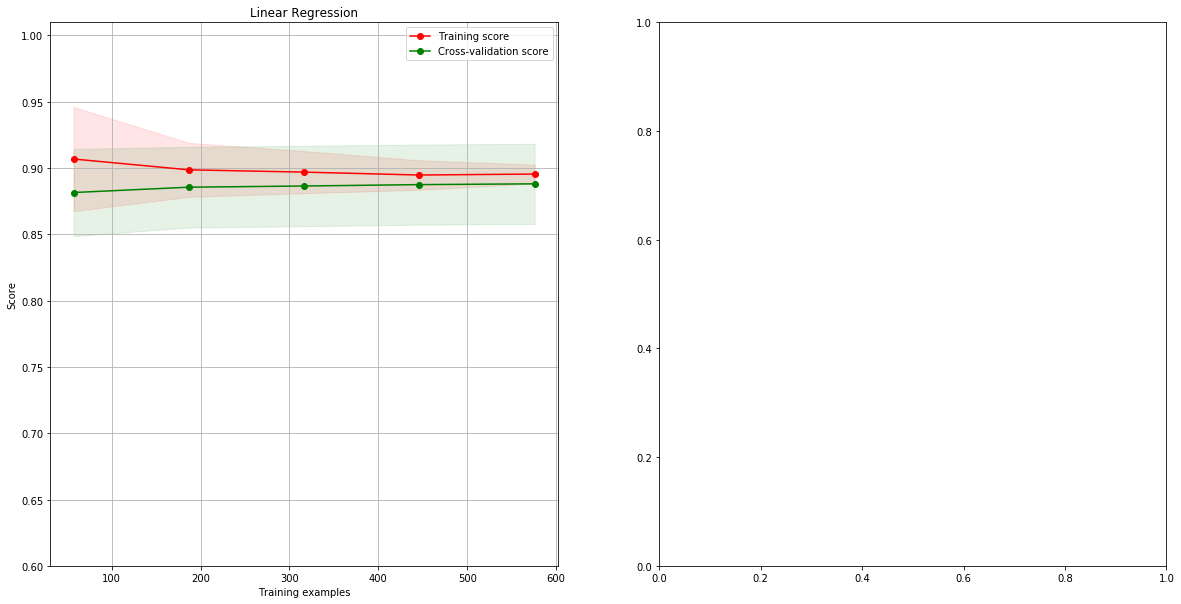

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10), squeeze=False)

title = "Linear Regression"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = LinearRegression()
plot_learning_curve(estimator, title, X, Y, axes=axes[:, 0], ylim=(0.6, 1.01), cv=cv, n_jobs=4)

#### Linear Regression graphs looks pretty good and I can see low variance in between training and validation data. This means the model is performing well on the test data. I might try RNN so I can compare the two, but not sure how straightforward it will be to do this.